In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pyodbc
from lmfit.models import PolynomialModel
import pylab as pl

In [2]:
sql_conn = pyodbc.connect('DRIVER={SQL Server};'
                            'SERVER=L_AAGDATIX;'
                            'DATABASE=DatixCRM;'
                            'Trusted_Connection=yes') 
query = "set transaction isolation level read uncommitted select inc_dincident from DatixCRM.dbo.incidents_main where inc_type='PAT' and inc_category='MEDIC' and inc_organisation='QA'"
df = pd.read_sql(query, sql_conn)
print(df)

     inc_dincident
0       2016-03-31
1       2016-03-31
2       2016-04-01
3       2016-03-25
4       2016-04-02
5       2016-04-01
6       2016-04-01
7       2016-04-02
8       2016-04-02
9       2016-04-03
10      2016-04-03
11      2016-04-02
12      2016-04-02
13      2016-04-02
14      2016-04-02
15      2016-04-02
16      2016-04-04
17      2016-04-02
18      2016-04-04
19      2016-04-02
20      2016-03-23
21      2016-04-02
22      2016-04-02
23      2016-04-04
24      2016-04-04
25      2016-04-05
26      2016-03-30
27      2016-04-06
28      2016-04-06
29      2016-04-06
...            ...
9021    2019-10-05
9022    2019-10-05
9023    2019-10-06
9024    2019-10-06
9025    2019-10-06
9026    2019-10-07
9027    2019-10-06
9028    2019-10-07
9029    2019-10-07
9030    2019-10-07
9031    2019-10-07
9032    2019-10-07
9033    2019-10-07
9034    2019-10-07
9035    2019-10-07
9036    2019-10-04
9037    2019-10-07
9038    2019-10-08
9039    2019-10-08
9040    2019-09-23
9041    2019

In [3]:
df = df[df.inc_dincident > '2016-03-31']
df = df[df.inc_dincident < '2019-10-01']
print(df)

     inc_dincident
2       2016-04-01
4       2016-04-02
5       2016-04-01
6       2016-04-01
7       2016-04-02
8       2016-04-02
9       2016-04-03
10      2016-04-03
11      2016-04-02
12      2016-04-02
13      2016-04-02
14      2016-04-02
15      2016-04-02
16      2016-04-04
17      2016-04-02
18      2016-04-04
19      2016-04-02
21      2016-04-02
22      2016-04-02
23      2016-04-04
24      2016-04-04
25      2016-04-05
27      2016-04-06
28      2016-04-06
29      2016-04-06
30      2016-04-06
31      2016-04-06
32      2016-04-06
33      2016-04-07
34      2016-04-05
...            ...
8950    2019-09-26
8951    2019-09-26
8952    2019-09-27
8953    2019-09-27
8954    2019-09-27
8955    2019-09-27
8956    2019-09-28
8957    2019-09-26
8958    2019-09-28
8959    2019-09-28
8960    2019-09-28
8961    2019-09-21
8962    2019-09-21
8963    2019-09-29
8964    2019-09-21
8965    2019-09-29
8966    2019-09-27
8967    2019-09-28
8968    2019-09-23
8969    2019-09-30
8970    2019

In [54]:
month_year = df.groupby([df.inc_dincident.dt.year, df.inc_dincident.dt.month]).agg('count')
print(month_year.values)

[[143]
 [186]
 [135]
 [126]
 [160]
 [159]
 [203]
 [187]
 [189]
 [178]
 [170]
 [195]
 [181]
 [207]
 [248]
 [215]
 [238]
 [237]
 [243]
 [235]
 [203]
 [209]
 [192]
 [227]
 [247]
 [271]
 [202]
 [201]
 [193]
 [195]
 [232]
 [227]
 [240]
 [243]
 [237]
 [249]
 [225]
 [248]
 [284]
 [323]
 [238]
 [248]]


In [34]:
days_in_month = np.ones(len(month_year.values))*31
days_in_month[0] = 30
days_in_month[2] = 30
days_in_month[5] = 30
days_in_month[7] = 30
days_in_month[10] = 28
days_in_month[12] = 30
days_in_month[14] = 30
days_in_month[17] = 30
days_in_month[19] = 30
days_in_month[22] = 28
days_in_month[24] = 30
days_in_month[26] = 30
days_in_month[29] = 30
days_in_month[31] = 30
days_in_month[34] = 28
days_in_month[36] = 30
days_in_month[38] = 30
days_in_month[41] = 30
print(days_in_month)

[30. 31. 30. 31. 31. 30. 31. 30. 31. 31. 28. 31. 30. 31. 30. 31. 31. 30.
 31. 30. 31. 31. 28. 31. 30. 31. 30. 31. 31. 30. 31. 30. 31. 31. 28. 31.
 30. 31. 30. 31. 31. 30.]


In [35]:
months_labels = ['Apr 16', 'May 16', 'Jun 16', 'Jul 16', 'Aug 16', 'Sep 16', 'Oct 16', 'Nov 16', 'Dec 16', 'Jan 17', 'Feb 17', 'Mar 17', 'Apr 17', 'May 17', 'Jun 17', 'Jul 17', 'Aug 17', 'Sep 17', 'Oct 17', 'Nov 17', 'Dec 17', 'Jan 18', 'Feb 18', 'Mar 18', 'Apr 18', 'May 18', 'Jun 18', 'Jul 18', 'Aug 18', 'Sep 18', 'Oct 18', 'Nov 18', 'Dec 18', 'Jan 19', 'Feb 19', 'Mar 19', 'Apr 19', 'May 19', 'Jun 19', 'Jul 19', 'Aug 19', 'Sep 19']

In [58]:
num_per_day = month_year.inc_dincident.values/days_in_month
num_per_day_err = np.sqrt(month_year.inc_dincident.values)/days_in_month

(-0.5, 3301.5, 495.5, -0.5)

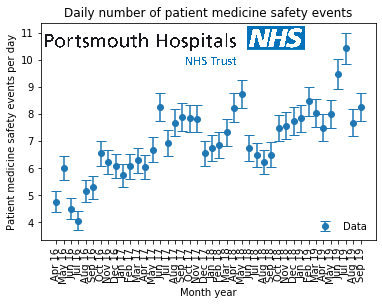

In [91]:
plt.errorbar(months_labels,num_per_day,num_per_day_err,capsize=5,fmt='o',label='Data');
plt.xticks(rotation='vertical');
plt.legend(loc='lower right',frameon=False)
plt.ylabel('Patient medicine safety events per day')
plt.xlabel('Month year')
plt.title('Daily number of patient medicine safety events')
img = plt.imread("nhsportsmouth.png");
ax = plt.axes([0.125+0.01,0.5, 0.6, 0.6], frameon=True)  # Change the numbers in this array to position your image [left, bottom, width, height])
ax.imshow(img)
ax.axis('off')  # get rid of the ticks and ticklabels

In [96]:
data_x = np.array([i for i in range(len(months_labels))])
data_y = num_per_day

In [98]:
# data fit
polynomial_mod = PolynomialModel(1)
pars = polynomial_mod.guess(data_y, x=data_x, c0=data_y[0], c1=0)
model = polynomial_mod
out = model.fit(data_y, pars, x=data_x)

(-0.5, 3301.5, 495.5, -0.5)

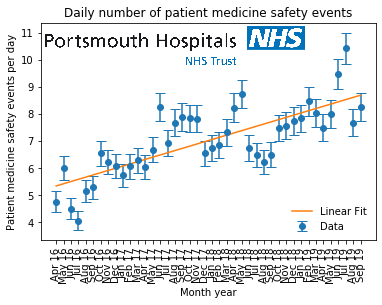

In [104]:
plt.errorbar(months_labels,num_per_day,num_per_day_err,capsize=5,fmt='o',label='Data');
plt.plot(months_labels, out.best_fit, label='Linear Fit')
plt.xticks(rotation='vertical');
plt.legend(loc='lower right',frameon=False)
plt.ylabel('Patient medicine safety events per day')
plt.xlabel('Month year')
plt.title('Daily number of patient medicine safety events')
img = plt.imread("nhsportsmouth.png");
ax = plt.axes([0.125+0.01,0.5, 0.6, 0.6], frameon=True)  # Change the numbers in this array to position your image [left, bottom, width, height])
ax.imshow(img)
ax.axis('off')  # get rid of the ticks and ticklabels

In [136]:
season_labels = ['Spring' for i in range(len(months_labels))]
for i in range(len(season_labels)):
    if 'Ju' in months_labels[i]: season_labels[i]='Summer'
    elif 'Au' in months_labels[i]: season_labels[i]='Summer'
    elif 'Se' in months_labels[i]: season_labels[i]='Autumn'
    elif 'Oc' in months_labels[i]: season_labels[i]='Autumn'
    elif 'No' in months_labels[i]: season_labels[i]='Autumn'
    elif 'De' in months_labels[i]: season_labels[i]='Winter'
    elif 'Ja' in months_labels[i]: season_labels[i]='Winter'
    elif 'Fe' in months_labels[i]: season_labels[i]='Winter'
print(season_labels)
colors = ['red','green','blue','purple']
season_codes = []
for season in season_labels:
    if season == 'Spring': season_codes.append(0)
    elif season == 'Summer': season_codes.append(1)
    elif season == 'Autumn': season_codes.append(2)
    else: season_codes.append(3)
print(season_codes)
season_colours = []
for season in season_labels:
    if season == 'Spring': season_colours.append('red')
    elif season == 'Summer': season_colours.append('green')
    elif season == 'Autumn': season_colours.append('blue')
    else: season_colours.append('purple')
print(season_colours)
print(len(months_labels))
print(len(num_per_day))
print(len(num_per_day_err))
print(len(season_colours))

['Spring', 'Spring', 'Summer', 'Summer', 'Summer', 'Autumn', 'Autumn', 'Autumn', 'Winter', 'Winter', 'Winter', 'Spring', 'Spring', 'Spring', 'Summer', 'Summer', 'Summer', 'Autumn', 'Autumn', 'Autumn', 'Winter', 'Winter', 'Winter', 'Spring', 'Spring', 'Spring', 'Summer', 'Summer', 'Summer', 'Autumn', 'Autumn', 'Autumn', 'Winter', 'Winter', 'Winter', 'Spring', 'Spring', 'Spring', 'Summer', 'Summer', 'Summer', 'Autumn']
[0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 0, 0, 0, 1, 1, 1, 2]
['red', 'red', 'green', 'green', 'green', 'blue', 'blue', 'blue', 'purple', 'purple', 'purple', 'red', 'red', 'red', 'green', 'green', 'green', 'blue', 'blue', 'blue', 'purple', 'purple', 'purple', 'red', 'red', 'red', 'green', 'green', 'green', 'blue', 'blue', 'blue', 'purple', 'purple', 'purple', 'red', 'red', 'red', 'green', 'green', 'green', 'blue']
42
42
42
42


In [151]:
num_per_spring_day = np.zeros(len(num_per_day))
num_per_summer_day = np.zeros(len(num_per_day))
num_per_autumn_day = np.zeros(len(num_per_day))
num_per_winter_day = np.zeros(len(num_per_day))
for idx,season in enumerate(season_labels):
    if season == 'Spring': num_per_spring_day[idx] = num_per_day[idx]
    elif season == 'Summer': num_per_summer_day[idx] = num_per_day[idx]
    elif season == 'Autumn': num_per_autumn_day[idx] = num_per_day[idx]
    else: num_per_winter_day[idx] = num_per_day[idx]
print(num_per_spring_day)

[4.76666667 6.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         6.29032258
 6.03333333 6.67741935 0.         0.         0.         0.
 0.         0.         0.         0.         0.         7.32258065
 8.23333333 8.74193548 0.         0.         0.         0.
 0.         0.         0.         0.         0.         8.03225806
 7.5        8.         0.         0.         0.         0.        ]


(-0.5, 3301.5, 495.5, -0.5)

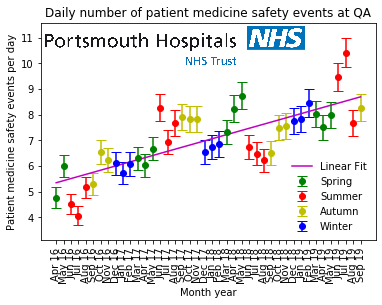

In [163]:
plt.errorbar(months_labels,num_per_spring_day,num_per_day_err,capsize=5,fmt='go',label='Spring');
plt.errorbar(months_labels,num_per_summer_day,num_per_day_err,capsize=5,fmt='ro',label='Summer');
plt.errorbar(months_labels,num_per_autumn_day,num_per_day_err,capsize=5,fmt='yo',label='Autumn');
plt.errorbar(months_labels,num_per_winter_day,num_per_day_err,capsize=5,fmt='bo',label='Winter');
plt.plot(months_labels, out.best_fit, '-m',label='Linear Fit')
plt.xticks(rotation='vertical');
plt.legend(loc='lower right',frameon=False)
plt.ylabel('Patient medicine safety events per day')
plt.xlabel('Month year')
plt.title('Daily number of patient medicine safety events at QA')
plt.ylim(bottom=3.1)
img = plt.imread("nhsportsmouth.png");
ax = plt.axes([0.125+0.01,0.5, 0.6, 0.6], frameon=True)  # Change the numbers in this array to position your image [left, bottom, width, height])
ax.imshow(img)
ax.axis('off')  # get rid of the ticks and ticklabels